# Web Traffic Times Series Forecasting

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
# Load data
df = pd.read_csv("train_1.csv (1).zip", compression = "zip")
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


# Interchanging Rows and Column of data to get it in proper time series formate

In [5]:
# Transpose rows and columns
df = df.T
df.head()

,0,1,2,3,4,5,6,7,8,9,...,145053,145054,145055,145056,145057,145058,145059,145060,145061,145062
Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_al...,Legión_(serie_de_televisión)_es.wikipedia.org_...,Doble_tentación_es.wikipedia.org_all-access_sp...,Mi_adorable_maldición_es.wikipedia.org_all-acc...,Underworld_(serie_de_películas)_es.wikipedia.o...,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,Francisco_el_matemático_(serie_de_televisión_d...
2015-07-01,18.0,11.0,1.0,35.0,NaN,12.0,NaN,118.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,11.0,14.0,0.0,13.0,NaN,7.0,NaN,26.0,23.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-03,5.0,15.0,1.0,10.0,NaN,4.0,NaN,30.0,14.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-04,13.0,18.0,1.0,94.0,NaN,5.0,NaN,24.0,12.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.reset_index()
df.head()

,index,0,1,2,3,4,5,6,7,8,...,145053,145054,145055,145056,145057,145058,145059,145060,145061,145062
0,Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_al...,Legión_(serie_de_televisión)_es.wikipedia.org_...,Doble_tentación_es.wikipedia.org_all-access_sp...,Mi_adorable_maldición_es.wikipedia.org_all-acc...,Underworld_(serie_de_películas)_es.wikipedia.o...,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,Francisco_el_matemático_(serie_de_televisión_d...
1,2015-07-01,18.0,11.0,1.0,35.0,NaN,12.0,NaN,118.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-07-02,11.0,14.0,0.0,13.0,NaN,7.0,NaN,26.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-07-03,5.0,15.0,1.0,10.0,NaN,4.0,NaN,30.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-07-04,13.0,18.0,1.0,94.0,NaN,5.0,NaN,24.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Capture 1st rows of data and make it column header
column_header = df.iloc[0,:].values

df.columns = column_header

In [8]:
df.head()

,Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider,Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-access_spider,Enamorándome_de_Ramón_es.wikipedia.org_all-access_spider,Hasta_el_último_hombre_es.wikipedia.org_all-access_spider,Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
0,Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_al...,Legión_(serie_de_televisión)_es.wikipedia.org_...,Doble_tentación_es.wikipedia.org_all-access_sp...,Mi_adorable_maldición_es.wikipedia.org_all-acc...,Underworld_(serie_de_películas)_es.wikipedia.o...,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,Francisco_el_matemático_(serie_de_televisión_d...
1,2015-07-01,18.0,11.0,1.0,35.0,NaN,12.0,NaN,118.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-07-02,11.0,14.0,0.0,13.0,NaN,7.0,NaN,26.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-07-03,5.0,15.0,1.0,10.0,NaN,4.0,NaN,30.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-07-04,13.0,18.0,1.0,94.0,NaN,5.0,NaN,24.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Drop 1st row
df = df.drop(0, axis = 0)

In [10]:
df.head()

,Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider,Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-access_spider,Enamorándome_de_Ramón_es.wikipedia.org_all-access_spider,Hasta_el_último_hombre_es.wikipedia.org_all-access_spider,Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
1,2015-07-01,18.0,11.0,1.0,35.0,NaN,12.0,NaN,118.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-07-02,11.0,14.0,0.0,13.0,NaN,7.0,NaN,26.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-07-03,5.0,15.0,1.0,10.0,NaN,4.0,NaN,30.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-07-04,13.0,18.0,1.0,94.0,NaN,5.0,NaN,24.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015-07-05,14.0,11.0,0.0,4.0,NaN,20.0,NaN,29.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Rename Page column to Date column
df = df.rename(columns = {"Page" : "Date"})

df.head()

,Date,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider,Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-access_spider,Enamorándome_de_Ramón_es.wikipedia.org_all-access_spider,Hasta_el_último_hombre_es.wikipedia.org_all-access_spider,Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
1,2015-07-01,18.0,11.0,1.0,35.0,NaN,12.0,NaN,118.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-07-02,11.0,14.0,0.0,13.0,NaN,7.0,NaN,26.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-07-03,5.0,15.0,1.0,10.0,NaN,4.0,NaN,30.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-07-04,13.0,18.0,1.0,94.0,NaN,5.0,NaN,24.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015-07-05,14.0,11.0,0.0,4.0,NaN,20.0,NaN,29.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Check data type of date column
print(df["Date"].dtype)

object


In [13]:
# Convert Date column to datetime datatype
df["Date"] = pd.to_datetime(df["Date"])

In [14]:
# Check Date column datatype again
print(df["Date"].dtype)

datetime64[ns]


In [15]:
# Set Date column as index
df = df.set_index("Date")

In [16]:
df.head()

,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider,Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-access_spider,Enamorándome_de_Ramón_es.wikipedia.org_all-access_spider,Hasta_el_último_hombre_es.wikipedia.org_all-access_spider,Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,18.0,11.0,1.0,35.0,NaN,12.0,NaN,118.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,11.0,14.0,0.0,13.0,NaN,7.0,NaN,26.0,23.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-03,5.0,15.0,1.0,10.0,NaN,4.0,NaN,30.0,14.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-04,13.0,18.0,1.0,94.0,NaN,5.0,NaN,24.0,12.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-05,14.0,11.0,0.0,4.0,NaN,20.0,NaN,29.0,9.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Now the data is in proper time series format.

# Splitting data based on different access types and different agents.

In [17]:
# Finding number of access types and agents
access_types = []
agents = []
for column in df.columns:
    access_type = column.split("_")[-2]
    agent = column.split("_")[-1]
    access_types.append(access_type)
    agents.append(agent)

In [18]:
# Counting access types
from collections import Counter
access_dict = Counter(access_types)
access_dict

Counter({'all-access': 74315, 'desktop': 34809, 'mobile-web': 35939})

In [19]:
print("Number of topics with all-access type:", access_dict["all-access"])
print("Number of topics with desktop access:", access_dict["desktop"])
print("Number of topics with mobile-web access:", access_dict["mobile-web"])

Number of topics with all-access type: 74315
Number of topics with desktop access: 34809
Number of topics with mobile-web access: 35939


In [20]:
access_df = pd.DataFrame({"Access type" : access_dict.keys(),
                          "Number of columns" : access_dict.values()})
access_df

,Access type,Number of columns
0,all-access,74315
1,desktop,34809
2,mobile-web,35939


In [21]:
# Counting agents
agents_dict = Counter(agents)
agents_dict

Counter({'spider': 34913, 'all-agents': 110150})

In [22]:
print("Number of topics with spider as agent:", agents_dict["spider"])
print("Number of topics with all-agents as agent:", agents_dict["all-agents"])

Number of topics with spider as agent: 34913
Number of topics with all-agents as agent: 110150


In [23]:
agents_df = pd.DataFrame({"Agent" : agents_dict.keys(),
                          "Number of columns" : agents_dict.values()})
agents_df

,Agent,Number of columns
0,spider,34913
1,all-agents,110150


In [24]:
# Identifying number of columns with null values with respect to access type
def count_null_columns(pattern):
    pattern_columns = [column for column in df.columns if pattern in column]
    return len(df[pattern_columns].isnull().sum()[df[pattern_columns].isnull().sum() > 0])

no_of_cols_with_nulls = [count_null_columns(access_type) for access_type in access_df["Access type"]]

access_df["No of columns with nulls"] = no_of_cols_with_nulls

access_df

,Access type,Number of columns,No of columns with nulls
0,all-access,74315,14808
1,desktop,34809,6647
2,mobile-web,35939,6331


In [25]:
# Identifying number of columns with null values with respect to agents
def count_null_columns(pattern):
    pattern_columns = [column for column in df.columns if pattern in column]
    return len(df[pattern_columns].isnull().sum()[df[pattern_columns].isnull().sum() > 0])

no_of_cols_with_nulls = [count_null_columns(agent) for agent in agents_df["Agent"]]

agents_df["No of columns with nulls"] = no_of_cols_with_nulls

agents_df

,Agent,Number of columns,No of columns with nulls
0,spider,34913,5904
1,all-agents,110150,21882


In [26]:
# Calculating percentage of null values in access types
access_df["% of nulls"] = access_df["No of columns with nulls"] / access_df["Number of columns"] * 100

access_df

,Access type,Number of columns,No of columns with nulls,% of nulls
0,all-access,74315,14808,19.925991
1,desktop,34809,6647,19.095636
2,mobile-web,35939,6331,17.615960


# Percentage of missing values in each access type is almost same. So there is no pattern in missing values.

In [27]:
# Calculating percentage of null values in agents
agents_df["% of nulls"] = agents_df["No of columns with nulls"] / agents_df["Number of columns"] * 100

agents_df

,Agent,Number of columns,No of columns with nulls,% of nulls
0,spider,34913,5904,16.910606
1,all-agents,110150,21882,19.865638


# Percentae of missing values is almost same with each agents. So there is no pattern in missing values.

# Splitting data based on different projects (like 'en.wikipedia.org')

In [28]:
df.columns[86543].split("_")[-3:]

['ja.wikipedia.org', 'desktop', 'all-agents']

In [29]:
"_".join(df.columns[86543].split("_")[-3:])

'ja.wikipedia.org_desktop_all-agents'

In [30]:
df.columns[86543]

'種田梨沙_ja.wikipedia.org_desktop_all-agents'

In [31]:
projects = []
for column in df.columns:
    project = column.split("_")[-3] # Extracting language code from column name (topic name)
    projects.append(project)

In [32]:
project_dict = Counter(projects)
project_dict

Counter({'zh.wikipedia.org': 17229,
         'fr.wikipedia.org': 17802,
         'en.wikipedia.org': 24108,
         'commons.wikimedia.org': 10555,
         'ru.wikipedia.org': 15022,
         'www.mediawiki.org': 7300,
         'de.wikipedia.org': 18547,
         'ja.wikipedia.org': 20431,
         'es.wikipedia.org': 14069})

In [33]:
project_df = pd.DataFrame({"Project" : project_dict.keys(),
                           "Number of columns" : project_dict.values()})

project_df

,Project,Number of columns
0,zh.wikipedia.org,17229
1,fr.wikipedia.org,17802
2,en.wikipedia.org,24108
3,commons.wikimedia.org,10555
4,ru.wikipedia.org,15022
5,www.mediawiki.org,7300
6,de.wikipedia.org,18547
7,ja.wikipedia.org,20431
8,es.wikipedia.org,14069


In [34]:
# Identifying number of columns with null values with respect to projects
def count_null_columns(pattern):
    pattern_columns = [column for column in df.columns if pattern in column]
    return len(df[pattern_columns].isnull().sum()[df[pattern_columns].isnull().sum() > 0])

no_of_cols_with_nulls = [count_null_columns(project) for project in project_df["Project"]]

project_df["No of columns with nulls"] = no_of_cols_with_nulls

project_df

,Project,Number of columns,No of columns with nulls
0,zh.wikipedia.org,17229,4039
1,fr.wikipedia.org,17802,2012
2,en.wikipedia.org,24108,5811
3,commons.wikimedia.org,10555,5149
4,ru.wikipedia.org,15022,1573
5,www.mediawiki.org,7300,3534
6,de.wikipedia.org,18547,2368
7,ja.wikipedia.org,20431,2030
8,es.wikipedia.org,14069,1270


In [35]:
# Calculating percentage of null values
project_df["% of nulls"] = project_df["No of columns with nulls"] / project_df["Number of columns"] * 100

project_df

,Project,Number of columns,No of columns with nulls,% of nulls
0,zh.wikipedia.org,17229,4039,23.443032
1,fr.wikipedia.org,17802,2012,11.302101
2,en.wikipedia.org,24108,5811,24.104032
3,commons.wikimedia.org,10555,5149,48.782568
4,ru.wikipedia.org,15022,1573,10.471309
5,www.mediawiki.org,7300,3534,48.410959
6,de.wikipedia.org,18547,2368,12.767563
7,ja.wikipedia.org,20431,2030,9.935882
8,es.wikipedia.org,14069,1270,9.026939


In [36]:
project_df.sort_values(by = "% of nulls", ascending = False)

,Project,Number of columns,No of columns with nulls,% of nulls
3,commons.wikimedia.org,10555,5149,48.782568
5,www.mediawiki.org,7300,3534,48.410959
2,en.wikipedia.org,24108,5811,24.104032
0,zh.wikipedia.org,17229,4039,23.443032
6,de.wikipedia.org,18547,2368,12.767563
1,fr.wikipedia.org,17802,2012,11.302101
4,ru.wikipedia.org,15022,1573,10.471309
7,ja.wikipedia.org,20431,2030,9.935882
8,es.wikipedia.org,14069,1270,9.026939


# columns with projects commons.wikimedia.org and www.mediawiki.org have 48% columns with null values

In [37]:
df.columns

Index(['2NE1_zh.wikipedia.org_all-access_spider',
       '2PM_zh.wikipedia.org_all-access_spider',
       '3C_zh.wikipedia.org_all-access_spider',
       '4minute_zh.wikipedia.org_all-access_spider',
       '52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider',
       '5566_zh.wikipedia.org_all-access_spider',
       '91Days_zh.wikipedia.org_all-access_spider',
       'A'N'D_zh.wikipedia.org_all-access_spider',
       'AKB48_zh.wikipedia.org_all-access_spider',
       'ASCII_zh.wikipedia.org_all-access_spider',
       ...
       'Drake_(músico)_es.wikipedia.org_all-access_spider',
       'Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider',
       'Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider',
       'Doble_tentación_es.wikipedia.org_all-access_spider',
       'Mi_adorable_maldición_es.wikipedia.org_all-access_spider',
       'Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider',
       'Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-ac

In [38]:
required_column_names = [column for column in df.columns if "commons.wikimedia.org" in column]

In [39]:
df[required_column_names].sum().mean()

99429.18484130743

In [40]:
df[required_column_names]

,Accueil_commons.wikimedia.org_all-access_spider,Atlas_of_Asia_commons.wikimedia.org_all-access_spider,Atlas_of_Europe_commons.wikimedia.org_all-access_spider,Atlas_of_World_War_II_commons.wikimedia.org_all-access_spider,Atlas_of_colonialism_commons.wikimedia.org_all-access_spider,Atlas_of_the_United_Kingdom_commons.wikimedia.org_all-access_spider,Atlas_of_the_United_States_commons.wikimedia.org_all-access_spider,Bikini_commons.wikimedia.org_all-access_spider,Campaign:OFBA2016_commons.wikimedia.org_all-access_spider,Catalogue_of_Wilhelm_von_Gloeden's_pictures_commons.wikimedia.org_all-access_spider,...,File:Artist’s_impression_of_the_ultracool_dwarf_star_TRAPPIST-1_from_close_to_one_of_its_planets.ogv_commons.wikimedia.org_desktop_all-agents,File:Torm_detsembris._Merivälja_Muul.jpg_commons.wikimedia.org_desktop_all-agents,File:Talv_Väike-Taevaskojas.jpg_commons.wikimedia.org_desktop_all-agents,Category:2016_Turkish_coup_d'état_attempt_commons.wikimedia.org_desktop_all-agents,File:Pokémon_Go_Release_Map.svg_commons.wikimedia.org_desktop_all-agents,Commons:Уики_обича_паметниците_2016_България_commons.wikimedia.org_desktop_all-agents,"File:Landgericht_Berlin,_Littenstraße,_Eingangshalle_(2),_160906,_ako.jpg_commons.wikimedia.org_desktop_all-agents",File:Battle_of_Mosul_(2016–2017).svg_commons.wikimedia.org_desktop_all-agents,File:Ура!.ogv_commons.wikimedia.org_desktop_all-agents,File:関東地方居住者の自治体別四年制大学卒業率.png_commons.wikimedia.org_desktop_all-agents
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,55.0,5.0,4.0,5.0,8.0,5.0,10.0,4.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,48.0,3.0,6.0,2.0,6.0,7.0,14.0,5.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-03,44.0,4.0,9.0,6.0,15.0,6.0,13.0,2.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-04,35.0,6.0,7.0,6.0,5.0,10.0,20.0,2.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-05,46.0,3.0,6.0,8.0,5.0,7.0,9.0,2.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,57.0,29.0,31.0,8.0,19.0,21.0,49.0,4.0,2.0,5.0,...,6.0,20.0,4.0,9.0,9.0,3.0,31.0,NaN,NaN,NaN
2016-12-28,74.0,37.0,31.0,13.0,30.0,13.0,10.0,5.0,3.0,12.0,...,10.0,24.0,12.0,15.0,12.0,3.0,27.0,NaN,NaN,NaN
2016-12-29,61.0,32.0,34.0,5.0,29.0,27.0,14.0,7.0,2.0,81.0,...,8.0,23.0,4.0,5.0,11.0,4.0,31.0,NaN,NaN,NaN


In [41]:
project_df["Project"]

0         zh.wikipedia.org
1         fr.wikipedia.org
2         en.wikipedia.org
3    commons.wikimedia.org
4         ru.wikipedia.org
5        www.mediawiki.org
6         de.wikipedia.org
7         ja.wikipedia.org
8         es.wikipedia.org
Name: Project, dtype: object

In [42]:
def extract_total_views(project):
    required_column_names = [column for column in df.columns if project in column]
    total_views = df[required_column_names].sum().sum()
    return total_views

In [43]:
total_views = []
for project in project_df["Project"]:
    total_views.append(extract_total_views(project))
    
total_views

[3171985333.0,
 6377823517.0,
 58748760323.0,
 1049475046.0,
 7998365818.0,
 229304903.0,
 8862013751.0,
 8571290162.0,
 9490200499.0]

In [44]:
project_df["Total views"] = total_views
project_df

,Project,Number of columns,No of columns with nulls,% of nulls,Total views
0,zh.wikipedia.org,17229,4039,23.443032,3.171985e+09
1,fr.wikipedia.org,17802,2012,11.302101,6.377824e+09
2,en.wikipedia.org,24108,5811,24.104032,5.874876e+10
3,commons.wikimedia.org,10555,5149,48.782568,1.049475e+09
4,ru.wikipedia.org,15022,1573,10.471309,7.998366e+09
5,www.mediawiki.org,7300,3534,48.410959,2.293049e+08
6,de.wikipedia.org,18547,2368,12.767563,8.862014e+09
7,ja.wikipedia.org,20431,2030,9.935882,8.571290e+09
8,es.wikipedia.org,14069,1270,9.026939,9.490200e+09


In [45]:
def extract_average_views(project):
    required_column_names = [column for column in df.columns if project in column]
    average_views = df[required_column_names].sum().mean()
    return average_views

In [46]:
average_views = []
for project in project_df["Project"]:
    average_views.append(extract_average_views(project))
    
average_views

[184107.33838295896,
 358264.4375351084,
 2436898.968101875,
 99429.18484130743,
 532443.4707761949,
 31411.630547945206,
 477813.86482989165,
 419523.7708384318,
 674546.9115786481]

In [47]:
project_df["Average views"] = average_views
project_df

,Project,Number of columns,No of columns with nulls,% of nulls,Total views,Average views
0,zh.wikipedia.org,17229,4039,23.443032,3.171985e+09,1.841073e+05
1,fr.wikipedia.org,17802,2012,11.302101,6.377824e+09,3.582644e+05
2,en.wikipedia.org,24108,5811,24.104032,5.874876e+10,2.436899e+06
3,commons.wikimedia.org,10555,5149,48.782568,1.049475e+09,9.942918e+04
4,ru.wikipedia.org,15022,1573,10.471309,7.998366e+09,5.324435e+05
5,www.mediawiki.org,7300,3534,48.410959,2.293049e+08,3.141163e+04
6,de.wikipedia.org,18547,2368,12.767563,8.862014e+09,4.778139e+05
7,ja.wikipedia.org,20431,2030,9.935882,8.571290e+09,4.195238e+05
8,es.wikipedia.org,14069,1270,9.026939,9.490200e+09,6.745469e+05


In [48]:
project_df['Total views'] = project_df['Total views'].astype('int64')
project_df['Average views'] = project_df['Average views'].astype('int64')
project_df

,Project,Number of columns,No of columns with nulls,% of nulls,Total views,Average views
0,zh.wikipedia.org,17229,4039,23.443032,3171985333,184107
1,fr.wikipedia.org,17802,2012,11.302101,6377823517,358264
2,en.wikipedia.org,24108,5811,24.104032,58748760323,2436898
3,commons.wikimedia.org,10555,5149,48.782568,1049475046,99429
4,ru.wikipedia.org,15022,1573,10.471309,7998365818,532443
5,www.mediawiki.org,7300,3534,48.410959,229304903,31411
6,de.wikipedia.org,18547,2368,12.767563,8862013751,477813
7,ja.wikipedia.org,20431,2030,9.935882,8571290162,419523
8,es.wikipedia.org,14069,1270,9.026939,9490200499,674546


In [49]:
project_df_sorted = project_df.sort_values(by = "Average views", ascending = False)
project_df_sorted

,Project,Number of columns,No of columns with nulls,% of nulls,Total views,Average views
2,en.wikipedia.org,24108,5811,24.104032,58748760323,2436898
8,es.wikipedia.org,14069,1270,9.026939,9490200499,674546
4,ru.wikipedia.org,15022,1573,10.471309,7998365818,532443
6,de.wikipedia.org,18547,2368,12.767563,8862013751,477813
7,ja.wikipedia.org,20431,2030,9.935882,8571290162,419523
1,fr.wikipedia.org,17802,2012,11.302101,6377823517,358264
0,zh.wikipedia.org,17229,4039,23.443032,3171985333,184107
3,commons.wikimedia.org,10555,5149,48.782568,1049475046,99429
5,www.mediawiki.org,7300,3534,48.410959,229304903,31411


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

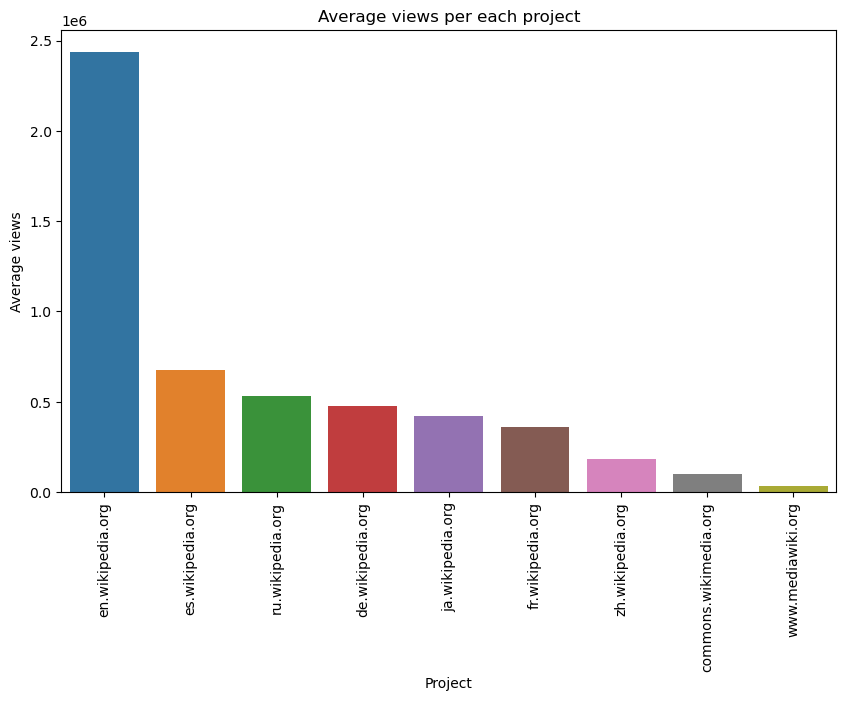

In [51]:
plt.figure(figsize = (10,6))
sns.barplot(x = project_df_sorted["Project"], y = project_df_sorted["Average views"])
plt.xticks(rotation = "vertical")
plt.title("Average views per each project")
plt.show()

# Popular pages in "en.wikipedia.org"

In [52]:
en_wikipedia_org_columns = [column for column in df.columns if "en.wikipedia.org" in column]

top_pages_en = df[en_wikipedia_org_columns].mean().sort_values(ascending = False)[0:5]
top_pages_en

Main_Page_en.wikipedia.org_all-access_all-agents         2.193851e+07
Main_Page_en.wikipedia.org_desktop_all-agents            1.595363e+07
Main_Page_en.wikipedia.org_mobile-web_all-agents         5.734518e+06
Special:Search_en.wikipedia.org_all-access_all-agents    2.371053e+06
Special:Search_en.wikipedia.org_desktop_all-agents       1.839723e+06
dtype: float64

<Axes: xlabel='Date'>

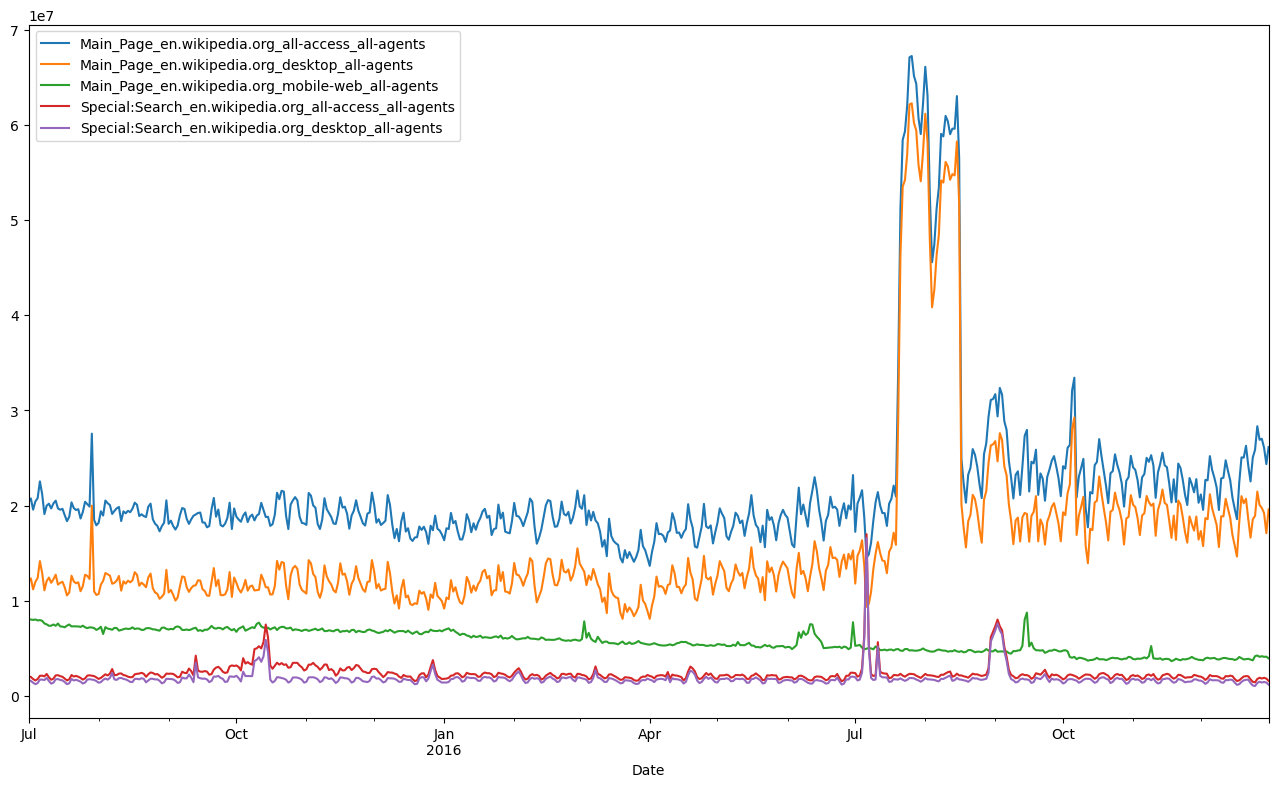

In [53]:
df[top_pages_en.index].plot(figsize = (16,9))

# Popular pages in "es.wikipedia.org"

In [54]:
es_wikipedia_org_columns = [column for column in df.columns if "es.wikipedia.org" in column]

top_pages_es = df[es_wikipedia_org_columns].mean().sort_values(ascending = False)[0:5]
top_pages_es

Wikipedia:Portada_es.wikipedia.org_all-access_all-agents    1.366350e+06
Wikipedia:Portada_es.wikipedia.org_mobile-web_all-agents    1.027413e+06
Especial:Buscar_es.wikipedia.org_all-access_all-agents      3.536204e+05
Wikipedia:Portada_es.wikipedia.org_desktop_all-agents       3.007988e+05
Especial:Buscar_es.wikipedia.org_desktop_all-agents         2.916932e+05
dtype: float64

<Axes: xlabel='Date'>

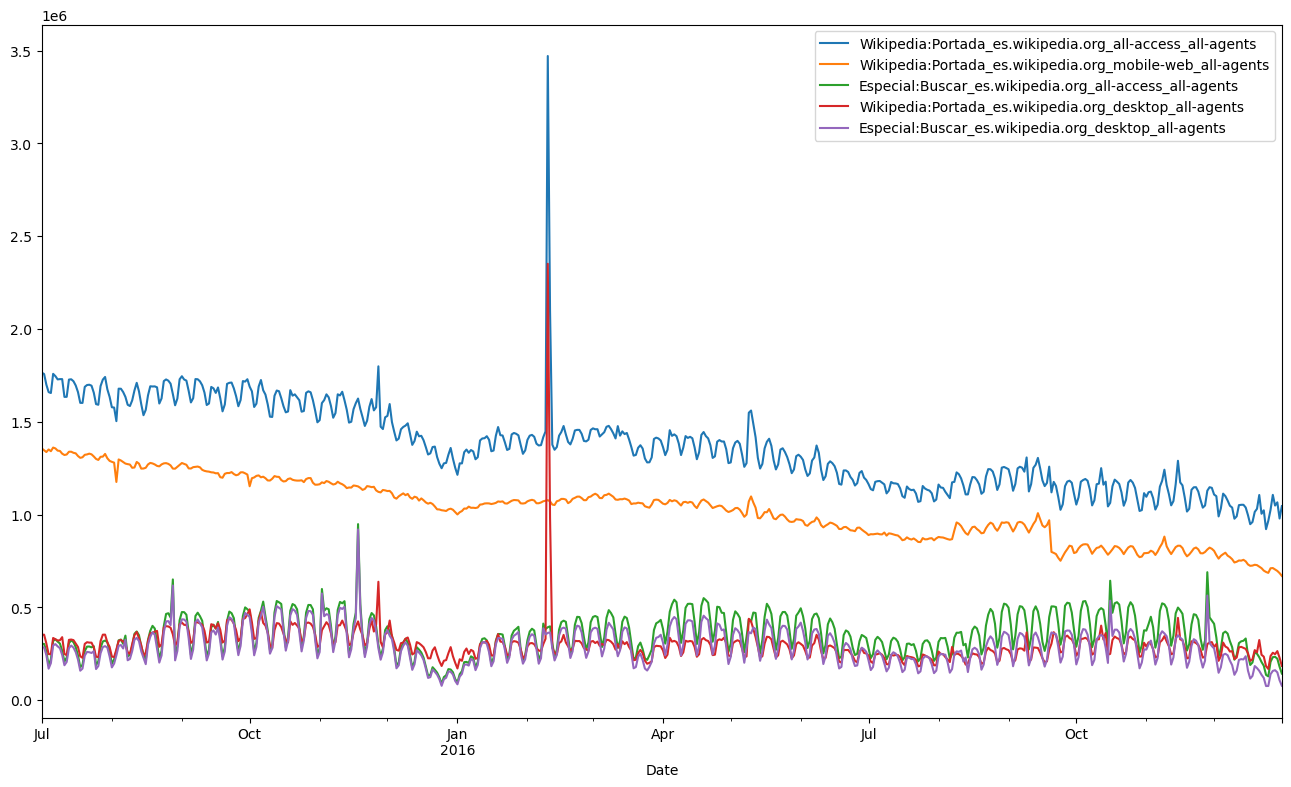

In [55]:
df[top_pages_es.index].plot(figsize = (16,9))

# Popular pages in "ru.wikipedia.org"

In [56]:
ru_wikipedia_org_columns = [column for column in df.columns if "ru.wikipedia.org" in column]

top_pages_ru = df[ru_wikipedia_org_columns].mean().sort_values(ascending = False)[0:5]
top_pages_ru

Заглавная_страница_ru.wikipedia.org_all-access_all-agents    1.974581e+06
Заглавная_страница_ru.wikipedia.org_desktop_all-agents       1.350691e+06
Заглавная_страница_ru.wikipedia.org_mobile-web_all-agents    5.962372e+05
Служебная:Поиск_ru.wikipedia.org_all-access_all-agents       1.886623e+05
Служебная:Поиск_ru.wikipedia.org_desktop_all-agents          1.793894e+05
dtype: float64

<Axes: xlabel='Date'>

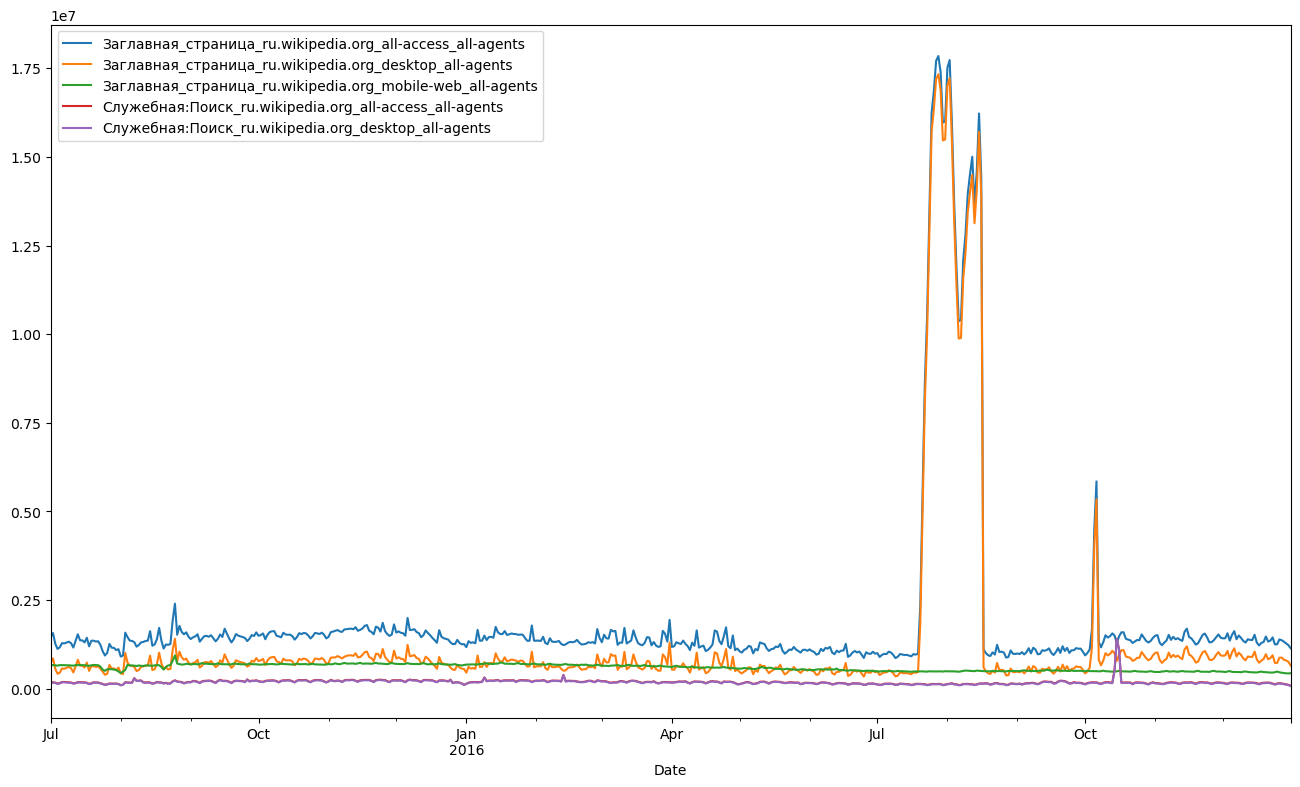

In [57]:
df[top_pages_ru.index].plot(figsize = (16,9))

# Popular pages in "de.wikipedia.org"

In [58]:
de_wikipedia_org_columns = [column for column in df.columns if "de.wikipedia.org" in column]

top_pages_de = df[de_wikipedia_org_columns].mean().sort_values(ascending = False)[0:5]
top_pages_de

Wikipedia:Hauptseite_de.wikipedia.org_all-access_all-agents    2.916244e+06
Wikipedia:Hauptseite_de.wikipedia.org_mobile-web_all-agents    2.023071e+06
Wikipedia:Hauptseite_de.wikipedia.org_desktop_all-agents       7.763499e+05
Spezial:Suche_de.wikipedia.org_all-access_all-agents           4.062290e+05
Spezial:Suche_de.wikipedia.org_desktop_all-agents              3.993396e+05
dtype: float64

<Axes: xlabel='Date'>

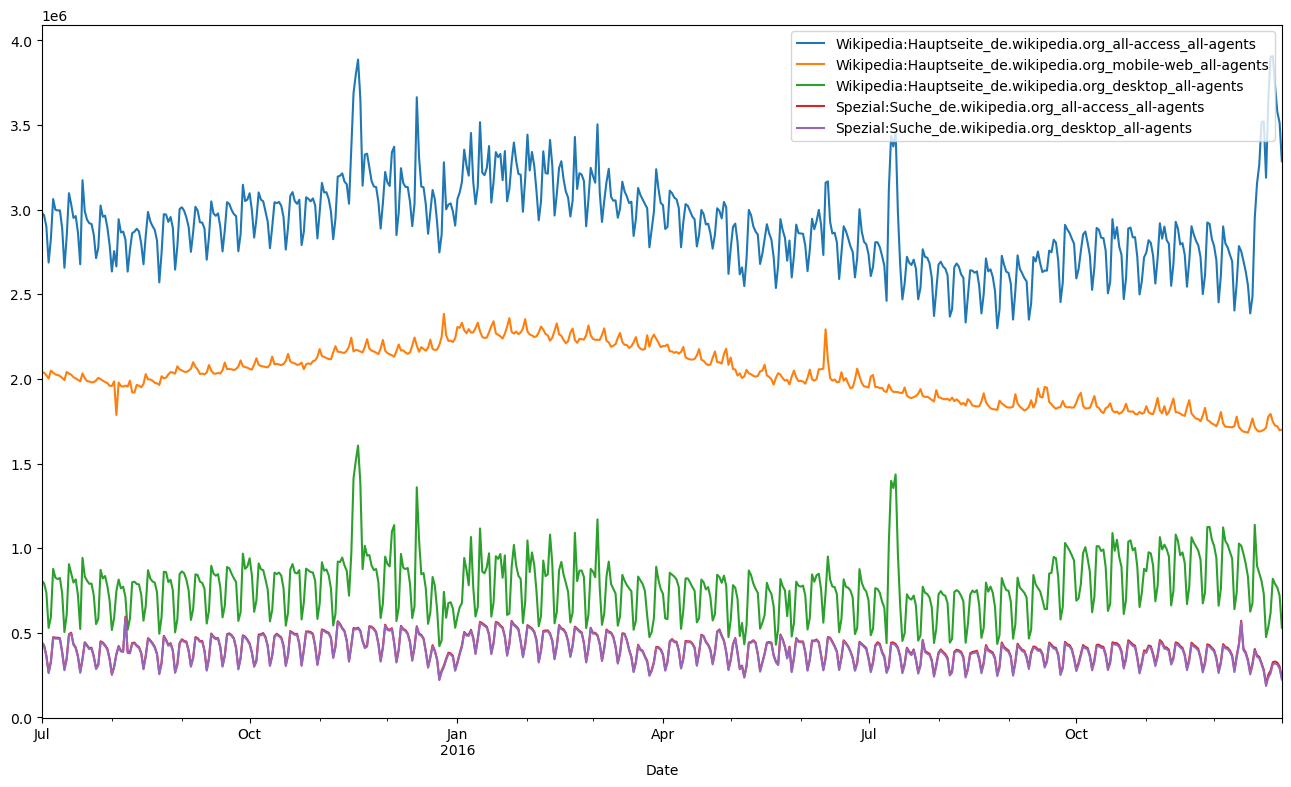

In [59]:
df[top_pages_de.index].plot(figsize = (16,9))

# Popular pages in "ja.wikipedia.org"

In [60]:
ja_wikipedia_org_columns = [column for column in df.columns if "ja.wikipedia.org" in column]

top_pages_ja = df[ja_wikipedia_org_columns].mean().sort_values(ascending = False)[0:5]
top_pages_ja

メインページ_ja.wikipedia.org_all-access_all-agents    383188.718182
メインページ_ja.wikipedia.org_desktop_all-agents       243904.390909
xss_ja.wikipedia.org_desktop_all-agents          138722.000000
特別:検索_ja.wikipedia.org_all-access_all-agents     127848.961818
特別:検索_ja.wikipedia.org_desktop_all-agents        125845.829091
dtype: float64

<Axes: xlabel='Date'>

C:\Users\panka\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12513 (\N{KATAKANA LETTER ME}) missing from current font.
  func(*args, **kwargs)
C:\Users\panka\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  func(*args, **kwargs)
C:\Users\panka\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  func(*args, **kwargs)
C:\Users\panka\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12506 (\N{KATAKANA LETTER PE}) missing from current font.
  func(*args, **kwargs)
C:\Users\panka\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  func(*args, **kwargs)
C:\Users\panka\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12472 (\N{KATAKANA LETTER ZI}) missing

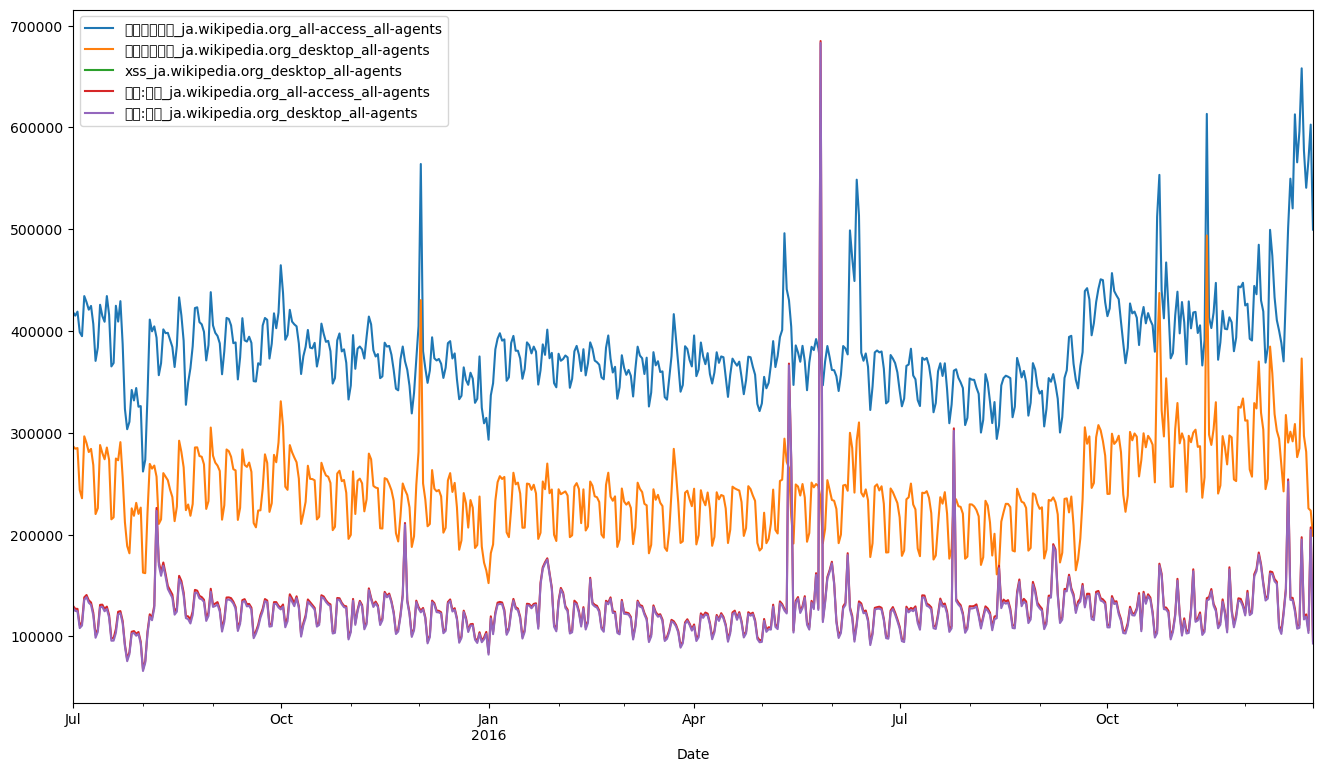

In [61]:
df[top_pages_ja.index].plot(figsize = (16,9))

# Popular pages in "fr.wikipedia.org"

In [62]:
fr_wikipedia_org_columns = [column for column in df.columns if "fr.wikipedia.org" in column]

top_pages_fr = df[fr_wikipedia_org_columns].mean().sort_values(ascending = False)[0:5]
top_pages_fr

Wikipédia:Accueil_principal_fr.wikipedia.org_all-access_all-agents    1.579056e+06
Wikipédia:Accueil_principal_fr.wikipedia.org_mobile-web_all-agents    1.111460e+06
Wikipédia:Accueil_principal_fr.wikipedia.org_desktop_all-agents       4.356164e+05
Spécial:Recherche_fr.wikipedia.org_all-access_all-agents              1.739389e+05
Spécial:Recherche_fr.wikipedia.org_desktop_all-agents                 1.608163e+05
dtype: float64

<Axes: xlabel='Date'>

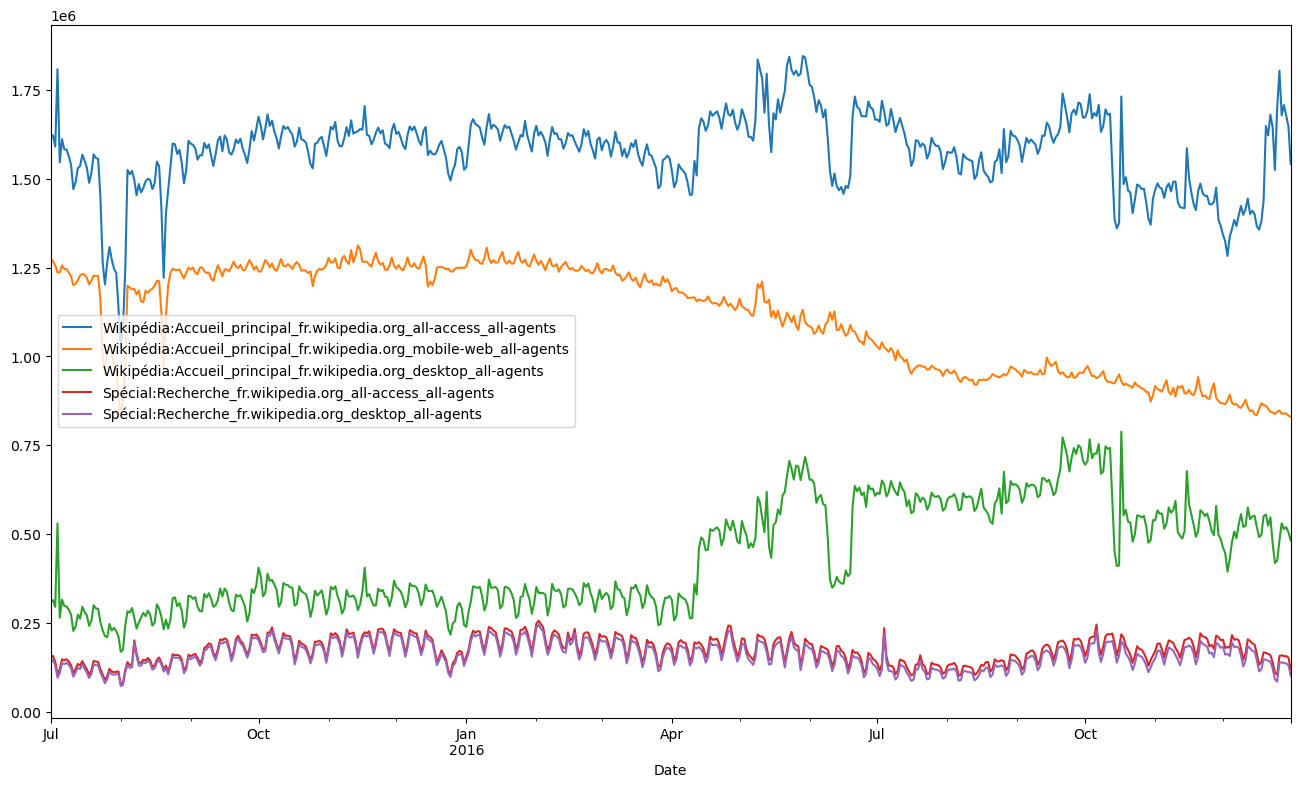

In [63]:
df[top_pages_fr.index].plot(figsize = (16,9))

# Popular pages in "zh.wikipedia.org"

In [64]:
zh_wikipedia_org_columns = [column for column in df.columns if "zh.wikipedia.org" in column]

top_pages_zh = df[zh_wikipedia_org_columns].mean().sort_values(ascending = False)[0:5]
top_pages_zh

Wikipedia:首页_zh.wikipedia.org_all-access_all-agents    224898.749091
Wikipedia:首页_zh.wikipedia.org_desktop_all-agents       120792.074545
Wikipedia:首页_zh.wikipedia.org_mobile-web_all-agents     92522.598182
Special:搜索_zh.wikipedia.org_all-access_all-agents       88505.680000
Special:搜索_zh.wikipedia.org_desktop_all-agents          87643.350909
dtype: float64

<Axes: xlabel='Date'>

C:\Users\panka\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 39318 (\N{CJK UNIFIED IDEOGRAPH-9996}) missing from current font.
  func(*args, **kwargs)
C:\Users\panka\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 39029 (\N{CJK UNIFIED IDEOGRAPH-9875}) missing from current font.
  func(*args, **kwargs)
C:\Users\panka\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 25628 (\N{CJK UNIFIED IDEOGRAPH-641C}) missing from current font.
  func(*args, **kwargs)
C:\Users\panka\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 32034 (\N{CJK UNIFIED IDEOGRAPH-7D22}) missing from current font.
  func(*args, **kwargs)
C:\Users\panka\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39318 (\N{CJK UNIFIED IDEOGRAPH-9996}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\panka\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWar

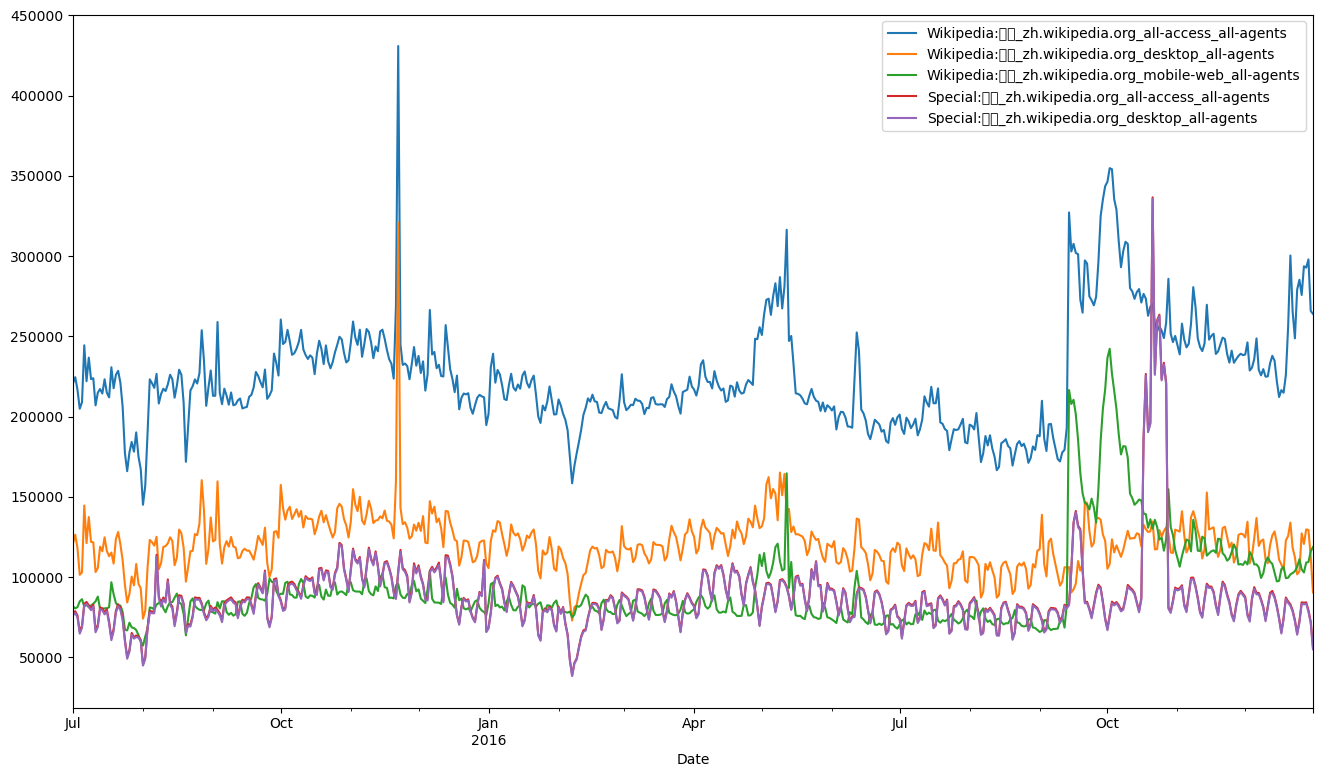

In [65]:
df[top_pages_zh.index].plot(figsize = (16,9))

# Popular pages in "commons.wikipedia.org"

In [66]:
commons_wikipedia_org_columns = [column for column in df.columns if "commons.wikimedia.org" in column]

top_pages_commons = df[commons_wikipedia_org_columns].mean().sort_values(ascending = False)[0:5]
top_pages_commons

Special:CreateAccount_commons.wikimedia.org_all-access_all-agents    259881.091787
Special:CreateAccount_commons.wikimedia.org_desktop_all-agents       232178.884058
Special:Search_commons.wikimedia.org_all-access_all-agents           122092.069091
Special:Search_commons.wikimedia.org_desktop_all-agents              115181.374545
Main_Page_commons.wikimedia.org_all-access_all-agents                 95876.894545
dtype: float64

<Axes: xlabel='Date'>

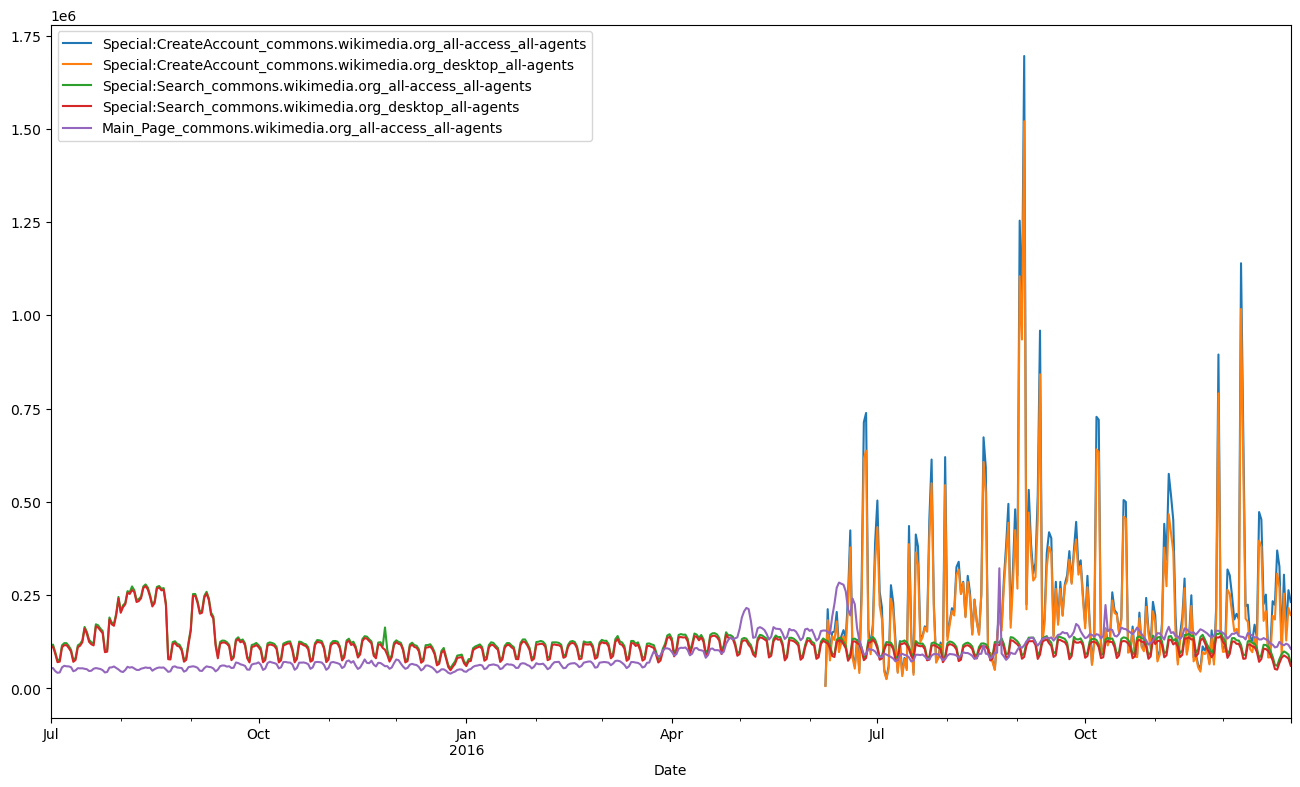

In [67]:
df[top_pages_commons.index].plot(figsize = (16,9))

# Popular pages in "www.mediawiki.org"

In [68]:
mediawiki_org_columns = [column for column in df.columns if "www.mediawiki.org" in column]

top_pages_mediawiki = df[mediawiki_org_columns].mean().sort_values(ascending = False)[0:5]
top_pages_mediawiki

MediaWiki_www.mediawiki.org_all-access_all-agents                             31103.154545
MediaWiki_www.mediawiki.org_desktop_all-agents                                24010.001818
Special:CreateAccount_www.mediawiki.org_all-access_all-agents                 11767.389423
Special:CreateAccount_www.mediawiki.org_desktop_all-agents                    11127.461538
Special:MyLanguage/Help:Logging_in_www.mediawiki.org_all-access_all-agents     9019.054118
dtype: float64

<Axes: xlabel='Date'>

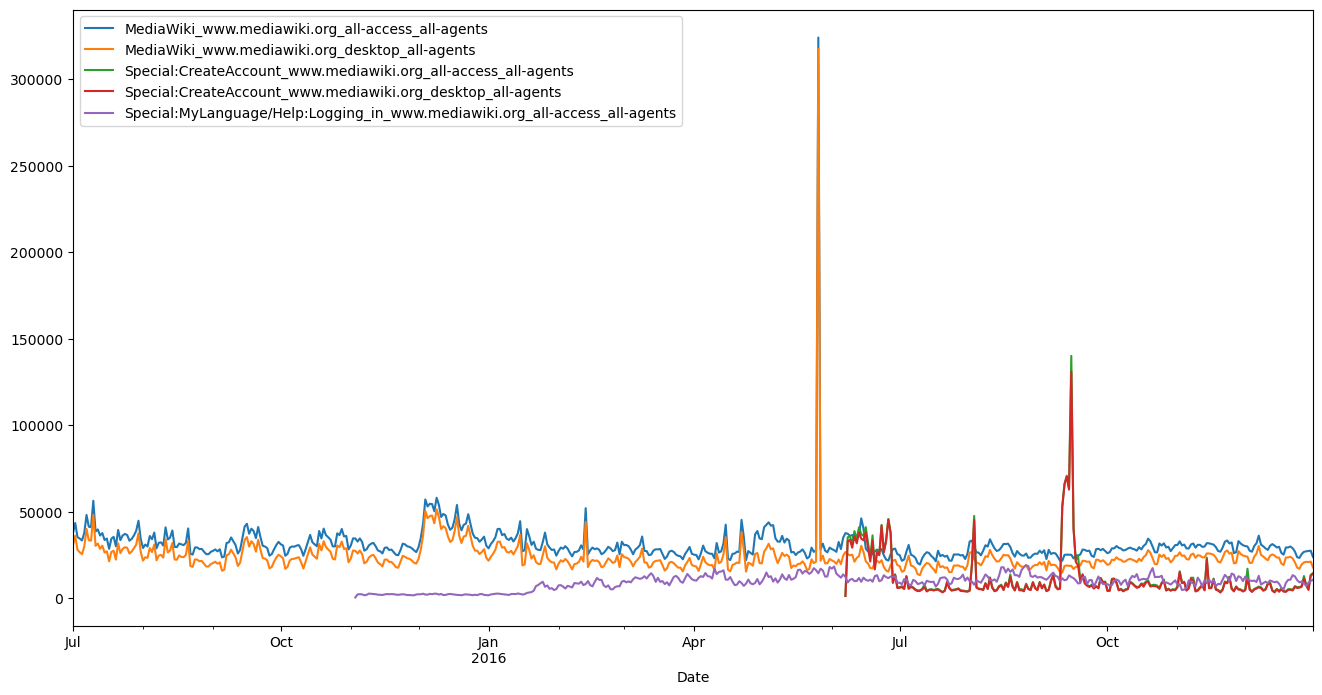

In [69]:
df[top_pages_mediawiki.index].plot(figsize = (16,8))